In [59]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv('./Diabetes.csv')

In [61]:
print(dataset)

     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  outcome  
0                       0.627   50     True  
1                  

In [62]:
dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


### Kmean

In [106]:
import pandas as pd
%matplotlib inline
data=pd.read_csv('./Diabetes.csv')
data.head(5)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [108]:
data.groupby('outcome').size()

outcome
False    500
True     268
dtype: int64

In [109]:
X=data.iloc[:,0:8]
Y=data.iloc[:,8]
print('shape of X:{},shape of Y:{}'.format(X.shape,Y.shape))

shape of X:(768, 8),shape of Y:(768,)


In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [131]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import KFold
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=2)))
models.append(("KNN with weights",KNeighborsClassifier(n_neighbors=2,weights='distance')))
models.append(("Radius nerghbors",RadiusNeighborsClassifier(n_neighbors=2,radius=500.0)))
results=[]
for name,model in models:
              model.fit(X_train,Y_train)
              results.append((name,model.score(X_test,Y_test)))
for i in range(len(results)):
              print('name:{};score:{}'.format(results[i][0],results[i][1]))
              

name:KNN;score:0.6979166666666666
name:KNN with weights;score:0.7135416666666666
name:Radius nerghbors;score:0.640625


/home/s5514324/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:462: FutureWarning: Passing additional keyword parameters has no effect and is deprecated in 1.0. An error will be raised from 1.2 and beyond. The ignored keyword parameter(s) are: dict_keys(['n_neighbors']).
  warnings.warn(


In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,X,Y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print('name:{};cross_val_scores:{}'.format(results[i][0],results[i][1].mean()))

name:KNN;cross_val_scores:0.7147641831852358
name:KNN with weights;cross_val_scores:0.6770505809979495
name:Radius nerghbors;cross_val_scores:0.6497265892002735


In [133]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
train_score=knn.score(X_train,Y_train)
test_score=knn.score(X_test,Y_test)
print('train score:{};test score:{}'.format(train_score,test_score))

train score:0.8506944444444444;test score:0.6979166666666666


<Figure size 1440x864 with 0 Axes>

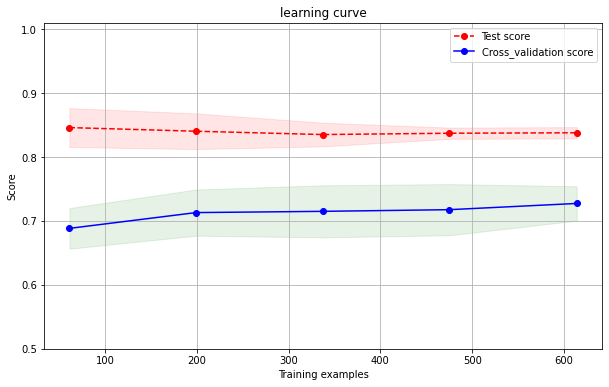

In [138]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt
import numpy as np
knn=KNeighborsClassifier(n_neighbors=2)
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
plt.figure(figsize=(10,6),dpi=144)


def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    """train line"""
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores=learning_curve(knn,X,Y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o--',color='r',label='Test score')
    plt.plot(train_sizes,test_scores_mean,'o-',color='b',label='Cross_validation score')
    plt.legend(loc='best')
    return plt
plt.figure(figsize=(10,6))
plt.plot()
plot_learning_curve(knn,'learning curve',X,Y,ylim=(0.5,1.01),cv=cv)
plt.show()

In [135]:
from sklearn.feature_selection import SelectKBest
selector=SelectKBest(k=2)
X_new=selector.fit_transform(X,Y)
X_new[0:5]

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       [ 89. ,  28.1],
       [137. ,  43.1]])

In [139]:
results=[]
for name,model in models:
    kfold=KFold(n_splits=5)
    cv_result=cross_val_score(model,X_new,Y,cv=kfold)
    results.append((name,cv_result))
for i in range(len(results)):
    print('name:{};cross_val_scores:{}'.format(results[i][0],results[i][1].mean()))

name:KNN;cross_val_scores:0.7226975638740344
name:KNN with weights;cross_val_scores:0.6874543756896698
name:Radius nerghbors;cross_val_scores:0.6511586452762923


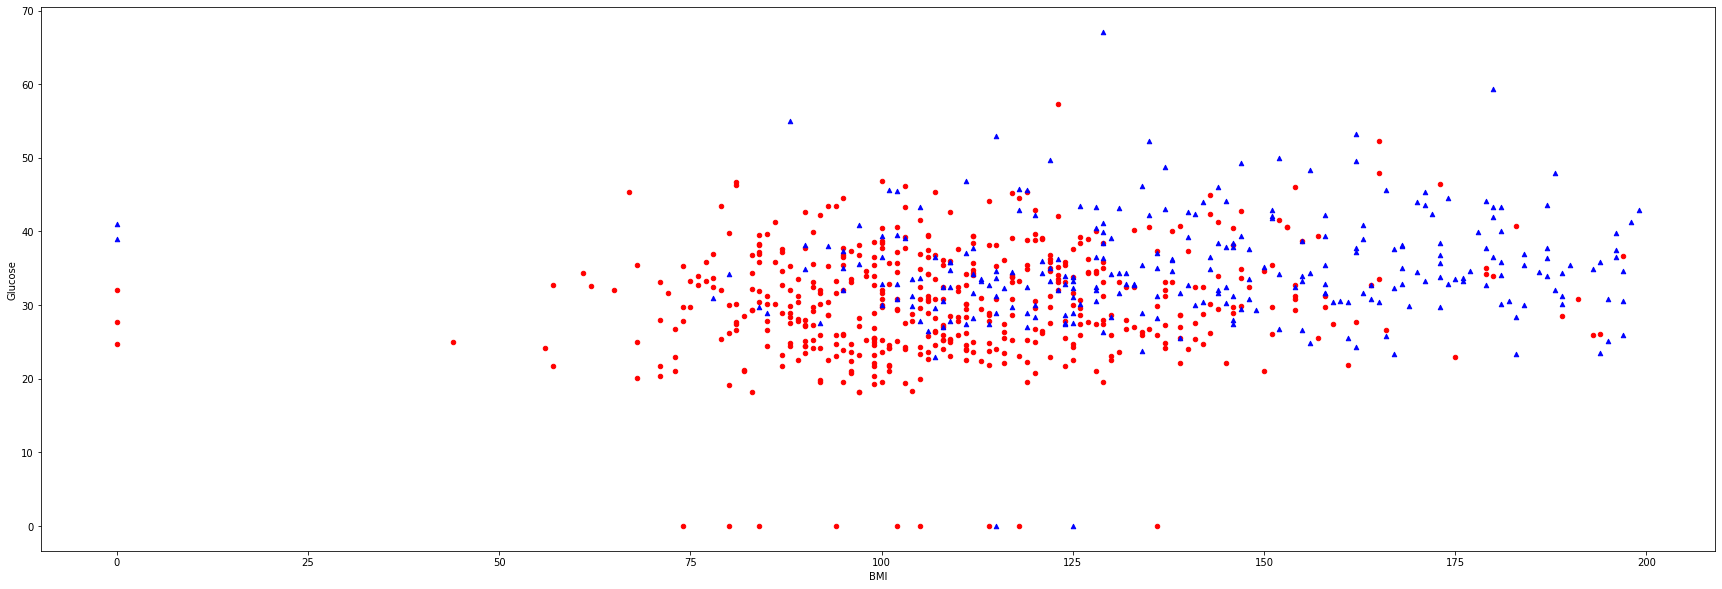

In [140]:
plt.figure(figsize=(30,10))
plt.ylabel('Glucose')
plt.xlabel('BMI')

plt.scatter(X_new[Y==0][:,0],X_new[Y==0][:,1],c='r',s=20,marker='o')
plt.scatter(X_new[Y==1][:,0],X_new[Y==1][:,1],c='b',s=20,marker='^')
plt.show()

### KNN

In [63]:
Target = df['outcome']
Target 

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: outcome, Length: 768, dtype: bool

In [64]:
Dataset = df.drop(columns=['outcome'])
Dataset

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [65]:
X_train, X_test, y_train, y_test = train_test_split(Dataset, Target, test_size=0.25, random_state=42)

In [66]:
X_train

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [67]:
y_train

357     True
73     False
352    False
497    False
145    False
       ...  
71     False
106    False
270     True
435     True
102    False
Name: outcome, Length: 576, dtype: bool

In [68]:
X_test

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
554,1,84,64,23,115,36.9,0.471,28
319,6,194,78,0,0,23.5,0.129,59
594,6,123,72,45,230,33.6,0.733,34
6,3,78,50,32,88,31.0,0.248,26


In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
accuracy = knn.score(X_test, y_test)

In [70]:
print("Accuracy: ", accuracy)

Accuracy:  0.640625


In [71]:
K_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, K_pred)

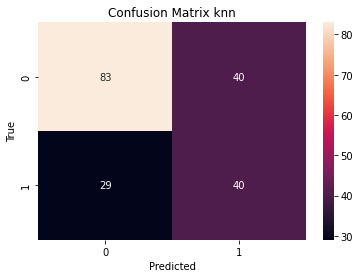

In [72]:
sns.heatmap(knn_cm, annot=True, fmt='d')
plt.title('Confusion Matrix knn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [74]:
accuracy = clf.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7291666666666666


In [75]:
y_pred = clf.predict(X_test)

In [76]:
cm = confusion_matrix(y_test, y_pred)

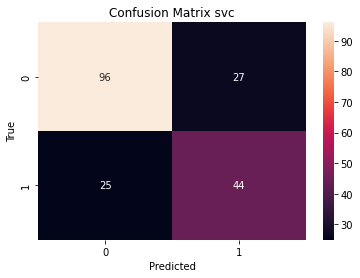

In [77]:
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix svc')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
log = LogisticRegression()
log.fit(X_train, y_train)

/home/s5514324/.pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
l_pred = log.predict(X_test)

In [81]:
accuracy_L = log.score(X_test, y_test)
print("Accuracy:", accuracy_L)

Accuracy: 0.7291666666666666


In [82]:
cm_L = confusion_matrix(y_test, l_pred)

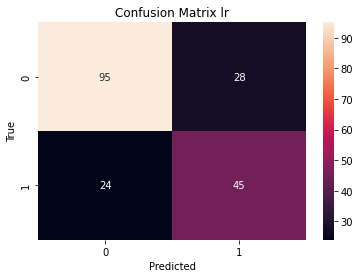

In [83]:
sns.heatmap(cm_L, annot=True, fmt='d')
plt.title('Confusion Matrix lr')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

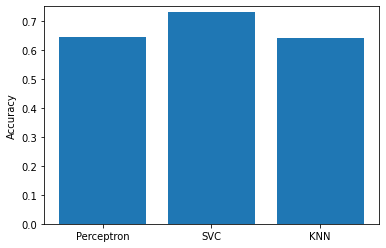

In [147]:
labels = ['Perceptron', 'SVC', 'KNN']
accuracies = [accuracy_perceptron, accuracy_svc, accuracy_knn]
fig, ax = plt.subplots()
ax.bar(labels, accuracies)
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 0.75])
plt.show()